In [1]:
import os
import matplotlib.pyplot as plt
import sys
import tensorflow as tf

# Adiciona o diretório src ao sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Para rodar no notebook
%matplotlib inline

# Importar as funções de data augmentation
from funcoes_augmentation import load_and_preprocess_image, fixed_rotation, adjust_brightness, adjust_contrast, adjust_saturation, apply_gaussian_blur, alter_color, apply_fixed_zoom, mixup_batch,cutmix_batch

Using TensorFlow backend


# Pré-processamento dos Dados com Data Augmentation

Neste notebook, definiremos as funções de data augmentation que serão utilizadas durante o treinamento do modelo. Para cada técnica, iremos:

- Definir a função correspondente.
- Aplicar a função a uma imagem de exemplo.
- Visualizar a imagem original e a imagem após a transformação.

As técnicas de data augmentation incluem:

- **Rotação**: ±10°, ±15°, ±20°
- **Alteração de Brilho**: 10%, 20%, 30%
- **Espelhamento Horizontal**
- **Zoom In e Zoom Out**
- **Deslocamento Horizontal e Vertical**

As técnicas serão aplicadas durante o treinamento no notebook `_treinamento_modelo.ipynb`.

---


In [2]:
# Diretório de treinamento
train_dir = '../dados/brutos/train'
test_dir = './dados/brutos/test'

# Lista das classes
classes = ['classe1_Vidro', 'classe2_Ceramica', 'classe3_Litico', 'classe4_Louca']

# Mapeamento das classes para índices
class_indices = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Carregamento de uma Imagem de Exemplo

Vamos selecionar uma imagem de exemplo para aplicar as transformações.

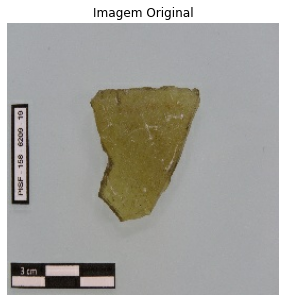

In [3]:
# Selecionar uma classe e obter uma imagem
example_class = classes[0]  # Por exemplo, 'classe1_Vidro'
example_class_dir = os.path.join(train_dir, example_class)
example_image_name = os.listdir(example_class_dir)[0]
example_image_path = os.path.join(example_class_dir, example_image_name)

# Carregar a imagem de exemplo
original_image = load_and_preprocess_image(example_image_path)

# Exibir a imagem original
plt.figure(figsize=(5, 5))
plt.imshow(original_image)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Aplicação e Visualização das Técnicas de Data Augmentation

# Rotação

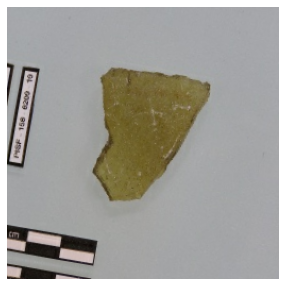

In [4]:
rotated_image = fixed_rotation(original_image, angle = -10)  # Rotaciona a imagem em 30 graus

plt.figure(figsize=(5, 5))
plt.imshow(rotated_image)
plt.axis('off')
plt.show()

# Alteração de Brilho

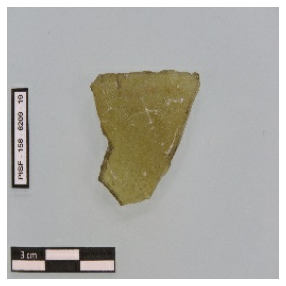

In [5]:
brightness_image = adjust_brightness(original_image, delta = 0.05)

plt.figure(figsize=(5, 5))
plt.imshow(brightness_image)
plt.axis('off')
plt.show()

# Contraste

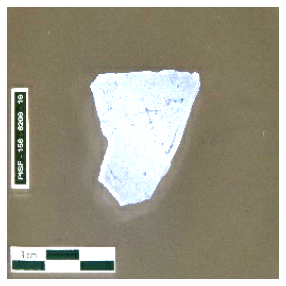

In [6]:
contrast_image = adjust_contrast(original_image, contrast_factor = -2.4)

plt.figure(figsize=(5, 5))
plt.imshow(contrast_image)
plt.axis('off')
plt.show()

# Saturação

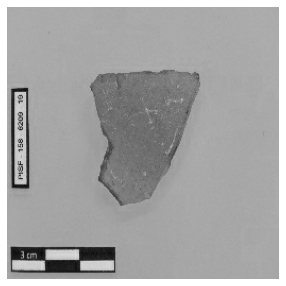

In [7]:
saturacao_image = adjust_saturation(original_image, saturation_factor = -2)

plt.figure(figsize=(5, 5))
plt.imshow(saturacao_image)
plt.axis('off')
plt.show()

# Gaussian Blur

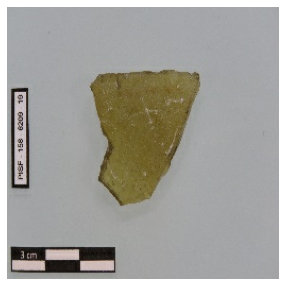

In [8]:
gaussian_blur = apply_gaussian_blur(original_image, kernel_size=3, sigma=0.01)

plt.figure(figsize=(5, 5))
plt.imshow(gaussian_blur)
plt.axis('off')
plt.show()

# Alteração de cor

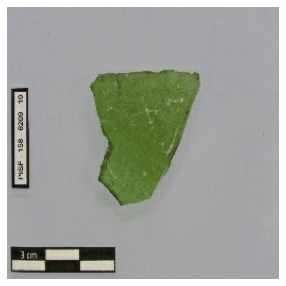

In [9]:
change_color = alter_color(original_image, hue_delta=0.1)

plt.figure(figsize=(5, 5))
plt.imshow(change_color)
plt.axis('off')
plt.show()

# Aplicação de Zoom-In

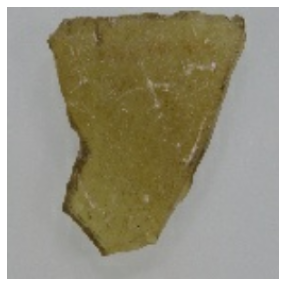

In [10]:
zoom_in = apply_fixed_zoom(original_image, zoom_factor=1.8)

plt.figure(figsize=(5, 5))
plt.imshow(zoom_in)
plt.axis('off')
plt.show()

#  Pixel-Level Data Augmentation (MixUp)

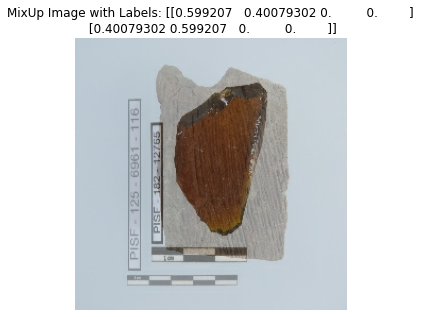

In [11]:
# Selecionar duas classes e obter uma imagem de cada
example_class1 = classes[0]  # Por exemplo, 'classe1_Vidro'
example_class2 = classes[1]  # Por exemplo, 'classe2_Ceramica'

example_class_dir1 = os.path.join(train_dir, example_class1)
example_class_dir2 = os.path.join(train_dir, example_class2)

example_image_name1 = os.listdir(example_class_dir1)[1]
example_image_name2 = os.listdir(example_class_dir2)[1]

example_image_path1 = os.path.join(example_class_dir1, example_image_name1)
example_image_path2 = os.path.join(example_class_dir2, example_image_name2)

# Carregar e pré-processar as imagens de exemplo
image1 = load_and_preprocess_image(example_image_path1)
image2 = load_and_preprocess_image(example_image_path2)

# Criar rótulos fictícios para as imagens (one-hot encoded)
label1 = tf.one_hot(class_indices[example_class1], depth=len(classes))
label2 = tf.one_hot(class_indices[example_class2], depth=len(classes))

# Criar um batch de tamanho 2 com as duas imagens e rótulos
images = tf.stack([image1, image2])
labels = tf.stack([label1, label2])

# Aplicar MixUp na combinação das duas imagens
mixed_images, mixed_labels = mixup_batch(images, labels,alpha=0.5)

# Visualizar a primeira imagem resultante de MixUp
plt.figure(figsize=(5, 5))
plt.imshow(mixed_images[0].numpy())
plt.title(f'MixUp Image with Labels: {mixed_labels[0].numpy()}')
plt.axis('off')
plt.show()

# Region-Level Data Augmentation (CutMix)

In [12]:
# Selecionar duas classes e obter uma imagem de cada
example_class1 = classes[0]  # Por exemplo, 'classe1_Vidro'
example_class2 = classes[1]  # Por exemplo, 'classe2_Ceramica'

example_class_dir1 = os.path.join(train_dir, example_class1)
example_class_dir2 = os.path.join(train_dir, example_class2)

example_image_name1 = os.listdir(example_class_dir1)[1]
example_image_name2 = os.listdir(example_class_dir2)[1]

example_image_path1 = os.path.join(example_class_dir1, example_image_name1)
example_image_path2 = os.path.join(example_class_dir2, example_image_name2)

# Carregar e pré-processar as imagens de exemplo
image1 = load_and_preprocess_image(example_image_path1)
image2 = load_and_preprocess_image(example_image_path2)

# Criar rótulos fictícios para as imagens (one-hot encoded)
label1 = tf.one_hot(class_indices[example_class1], depth=len(classes))
label2 = tf.one_hot(class_indices[example_class2], depth=len(classes))

# Criar um batch de tamanho 2 com as duas imagens e rótulos
images = tf.stack([image1, image2])
labels = tf.stack([label1, label2])

# Aplicar CutMix na combinação das duas imagens
mixed_images, mixed_labels = cutmix_batch(images, labels, alpha=10)

# Visualizar a primeira imagem resultante de CutMix
plt.figure(figsize=(5, 5))
plt.imshow(mixed_images[0].numpy())
plt.title(f'CutMix Image with Labels: {mixed_labels[0].numpy()}')
plt.axis('off')
plt.show()

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:Mul] name: 